In [1]:
import matplotlib.pyplot as plt
import numpy as np

Streaming output truncated to the last 5000 lines.
[-0.0007446610273214378, -0.14160361294751592, 0.21493558423093861, 0.9280139785878477]
predicted y: [-0.0007446610273214378, 1.000601288843949, 7.999902278704183]
temp: -8.036449306315701e-05
predicted y: [-0.0007446610273214378, 1.000601288843949, 7.999902278704183]
temp: 0.00013528208410495957
predicted y: [-0.0007446610273214378, 1.000601288843949, 7.999902278704183]
temp: 7.013455356023417e-05
predicted y: [-0.0007446610273214378, 1.000601288843949, 7.999902278704183]
temp: -6.0160507529216645e-05
[-0.0007422500925295431, -0.14160767141003908, 0.2149334801943318, 0.9280157834030736]
predicted y: [-0.0007422500925295431, 1.0005993420948367, 7.999902595089308]
temp: -8.010430279490825e-05
predicted y: [-0.0007422500925295431, 1.0005993420948367, 7.999902595089308]
temp: 0.00013484409115097998
predicted y: [-0.0007422500925295431, 1.0005993420948367, 7.999902595089308]
temp: 6.990748402306106e-05
predicted y: [-0.0007422500925295431,

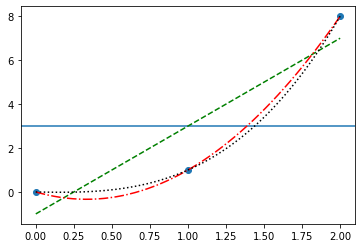

In [56]:
def get_points():
    # Return a dict of points (tuples) from user input
    # Ex. {2:3, 4:5}
    points = {}
    while True:
        point_input = input("Enter point (x, y) or \'done\': ")
        if point_input == 'done':
            break
        else:
            point_input = point_input.split(',')
            points[int(point_input[0])] = int(point_input[-1])
    return points

def find_equation_theta(point_dict):
    max_thetas = 4
    learning_rate = 0.03
    plot_points(point_dict)
    thetas = calculate_theta(point_dict, max_thetas, learning_rate)
    return thetas

def plot_points(point_dict):
    keys = list(point_dict.keys())
    values = list(point_dict.values())
    plt.plot(keys, values, 'o')

def calculate_theta(point_dict, max_thetas, learning_rate):
    return_thetas = []
    for i in range(4):
        # each loop calculates the appropriate theta for equations in the order of
        # linear (1 theta), linear (2 thetas), quadratic (3 thetas), cubic (4 thetas)
        theta_list = [0] * (i+1)
        # thetas act as the coefficients of the predicted line
        # linear (horizontal) would have 1 coefficient for x^0
        # linear (non-horizontal) would have another coefficient for x^1
        # repeat for quadratic and cubic
        x_values = list(point_dict.keys())
        # x_value is a list of only the x values of the points from user input
        x_vectors = [[x**k for k in range(i+1)] for x in x_values]
        # x_vectors is a list of nested lists where each nested list corresponds
        # to the x_value of each set of data points
        # Each nested list contains their one corresponding x value raised to their
        # respective index (Ex. data point (3, 5) for a quadratic approximation
        # has the nested list [1, 3, 9])
        predicted = []
        print(x_vectors)
        while True:
            convergence = 0
            delta_theta = []
            for j in range(len(theta_list)):
                # the value of j corresponds to the index of the theta
                predicted_y = [np.dot(theta_list, xv) for xv in x_vectors]
                # calculates the list of predicted y values by doing a dot product
                # (multiplying the powers of x by their respective coefficients then summing)
                predicted = list(predicted_y)
                print(f'predicted y: {predicted_y}')
                for k in range(len(predicted_y)):
                  predicted_y[k] -= point_dict[x_values[k]]
                  if j != 0:
                    predicted_y[k] *= x_vectors[k][j]
                # calculates the difference between the predicted and expected
                # also multiplies by the x value of the data point (x0 = 1)
                temp = sum(predicted_y)/len(predicted_y)
                print(f'temp: {temp}')
                delta_theta.append(learning_rate * temp)
                # delta theta list used after calculating for all thetas
                convergence = temp
                
            theta_list = list(np.subtract(theta_list, delta_theta))
            # change thetas after calculating delta for all thetas
            print(theta_list)
            if abs(convergence) < 0.00001:
                break
                # if the value of the cost function is < 0.0001, then declare convergence
        if i == 0:
          # plotting horizontal line
            plt.axhline(predicted[0])
        else:
            x = np.linspace(min(x_values), max(x_values))
            if i == 1:
                plt.plot(x, theta_list[1]*x + theta_list[0], '--g')
            elif i == 2:
                plt.plot(x, theta_list[2]*x**2 + theta_list[1]*x + theta_list[0], '-.r')
            else:
                plt.plot(x, theta_list[3]*x**3 + theta_list[2]*x**2 + theta_list[1]*x + theta_list[0], ':k')
        return_thetas.append(theta_list)
    return return_thetas
        
def give_lines(thetas):
    for t in thetas:
      if len(t) == 1:
        print(f'y = {t[0]} (Linear, solid blue)')
      elif len(t) == 2:
        print(f'y = {t[1]}x + {t[0]}, (Linear, dashed green)')
      elif len(t) == 3:
        print(f'y = {t[2]}x^2 + {t[1]}x + {t[0]}, (Quadratic, dashed-dot red)')
      else:
        print(f'y = {t[3]}x^3 + {t[2]}x^2 + {t[1]}x + {t[0]}, (Cubic, dotted black)')


point_dict = get_points()
if len(point_dict) > 0:
  thetas = find_equation_theta(point_dict)
  give_lines(thetas)


Streaming output truncated to the last 5000 lines.
temp: -0.017876121090574904
[1.2864150792068263, 0.01107318097774885, 0.010888627961453342]
-0.017876121090574904 0
predicted y: [1.2864150792068263, 1.3083768881460285, 1.3521159530081375]
temp: 0.00420293138743455
[1.2864150792068263, 0.011031151663874505, 0.010888627961453342]
0.00420293138743455 0
predicted y: [1.2864150792068263, 1.3083348588321542, 1.3520318943803886]
temp: 0.004132882530977137
[1.2864150792068263, 0.011031151663874505, 0.01084729913614357]
0.004132882530977137 0
predicted y: [1.2864150792068263, 1.3082935300068443, 1.3518665790791495]
temp: -0.01780827056905987
[1.2865931619125168, 0.011031151663874505, 0.01084729913614357]
-0.01780827056905987 0
predicted y: [1.2865931619125168, 1.3084716127125349, 1.35204466178484]
temp: 0.004186978760738332
[1.2865931619125168, 0.010989281876267121, 0.01084729913614357]
0.004186978760738332 0
predicted y: [1.2865931619125168, 1.3084297429249274, 1.3519609222096254]
temp: 0.00

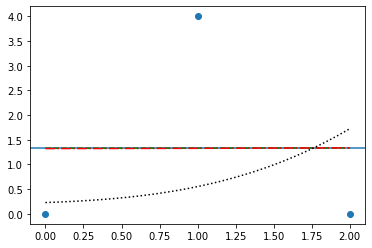

In [55]:
def get_points():
    # Return a dict of points (tuples) from user input
    # Ex. {2:3, 4:5}
    points = {}
    while True:
        point_input = input("Enter point (x, y) or \'done\': ")
        if point_input == 'done':
            break
        else:
            point_input = point_input.split(',')
            points[int(point_input[0])] = int(point_input[-1])
    return points

def find_equation_theta(point_dict):
    max_thetas = 4
    learning_rate = 0.01
    plot_points(point_dict)
    thetas = calculate_theta(point_dict, max_thetas, learning_rate)
    return thetas

def plot_points(point_dict):
    keys = list(point_dict.keys())
    values = list(point_dict.values())
    plt.plot(keys, values, 'o')

def calculate_theta(point_dict, max_thetas, learning_rate):
    return_thetas = []
    for i in range(4):
        # each loop calculates the appropriate theta for equations in the order of
        # linear (1 theta), linear (2 thetas), quadratic (3 thetas), cubic (4 thetas)
        theta_list = [0] * (i+1)
        x_values = list(point_dict.keys())
        x_vectors = [[x**k for k in range(i+1)] for x in x_values]
        predicted = []
        print(x_vectors)
        prev_convergence = 0
        convergence = 0
        while True:
            for j in range(len(theta_list)):
                predicted_y = [np.dot(theta_list, xv) for xv in x_vectors]
                predicted = list(predicted_y)
                print(f'predicted y: {predicted_y}')
                for k in range(len(predicted_y)):
                  predicted_y[k] -= point_dict[x_values[k]]
                  if j != 0:
                    predicted_y[k] *= x_values[k]
                temp = sum(predicted_y)/len(predicted_y)
                print(f'temp: {temp}')
                theta_list[j] -= learning_rate * temp
                print(theta_list)
                convergence = temp
                print(convergence, prev_convergence)
            if abs(convergence) < 0.001:
                break
        if i == 0:
          # plotting horizontal line
            plt.axhline(predicted[0])
        else:
            x = np.linspace(min(x_values), max(x_values))
            if i == 1:
                plt.plot(x, theta_list[1]*x + theta_list[0], '--g')
            elif i == 2:
                plt.plot(x, theta_list[2]*x**2 + theta_list[1]*x + theta_list[0], '-.r')
            else:
                plt.plot(x, theta_list[3]*x**3 + theta_list[2]*x**2 + theta_list[1]*x + theta_list[0], ':k')
        return_thetas.append(theta_list)
    return return_thetas
        
def give_lines(thetas):
    for t in thetas:
      if len(t) == 1:
        print(f'y = {t[0]} (Linear, solid blue)')
      elif len(t) == 2:
        print(f'y = {t[1]}x + {t[0]}, (Linear, dashed green)')
      elif len(t) == 3:
        print(f'y = {t[2]}x^2 + {t[1]}x + {t[0]}, (Quadratic, dashed-dot red)')
      else:
        print(f'y = {t[3]}x^3 + {t[2]}x^2 + {t[1]}x + {t[0]}, (Cubic, dotted black)')


point_dict = get_points()
if len(point_dict) > 0:
  thetas = find_equation_theta(point_dict)
  give_lines(thetas)